In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Student_Performance.csv')

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Extracurricular Activities']=lb.fit_transform(df['Extracurricular Activities'])

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

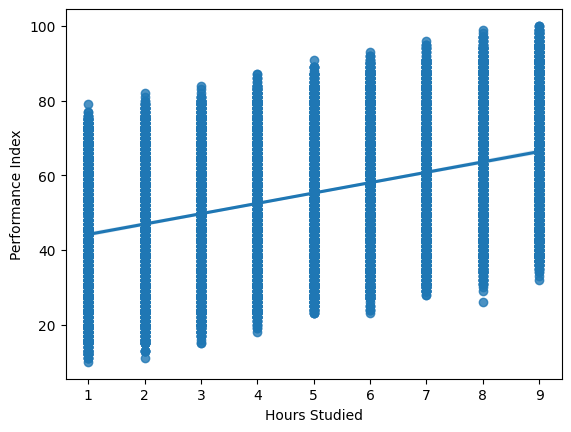

In [ ]:
import seaborn as sns
sns.regplot(x=df['Hours Studied'],y=y)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

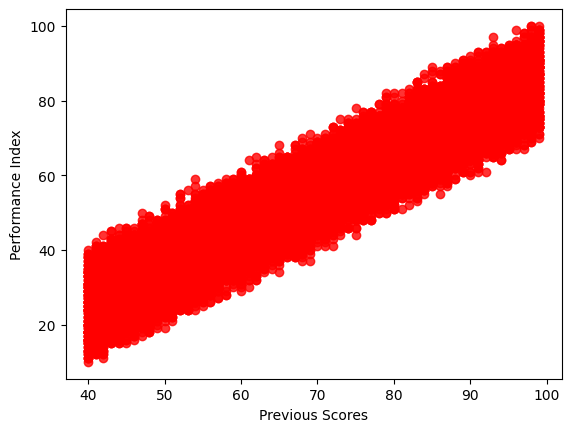

In [ ]:
sns.regplot(x=df['Previous Scores'],y=y,color='red')

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

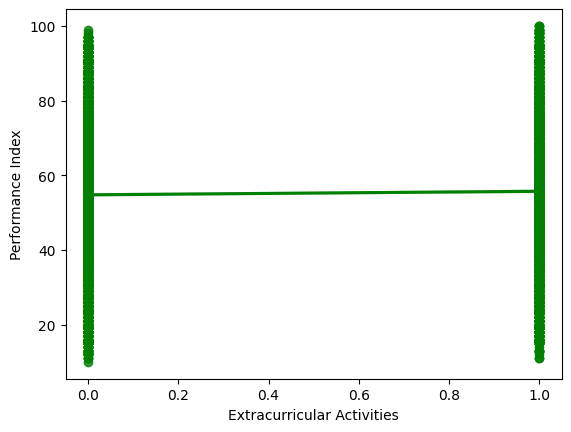

In [ ]:
sns.regplot(x=df['Extracurricular Activities'],y=y,color='green')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

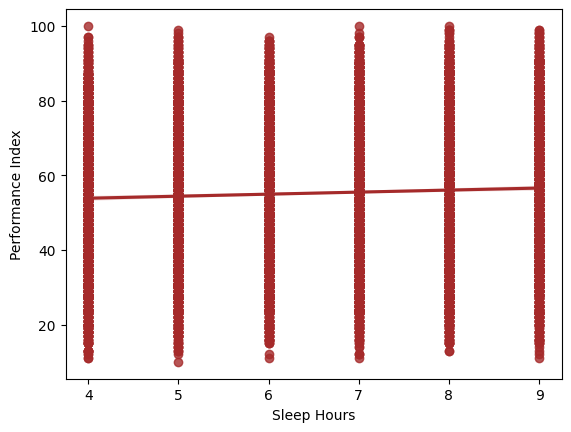

In [ ]:
sns.regplot(x=df['Sleep Hours'],y=y,color='brown')

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077])

In [ ]:
print('slope is ')
list(zip(x,model.coef_))

slope is 


[('Hours Studied', 2.8589522305235064),
 ('Previous Scores', 1.0155197942880816),
 ('Extracurricular Activities', 0.5817128541736178),
 ('Sleep Hours', 0.47967675981703317),
 ('Sample Question Papers Practiced', 0.19039415655051053)]

In [ ]:
print('constant is',model.intercept_)

constant is -33.836543807141744


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print('mean absolute error ',mean_absolute_error(y_test,y_pred))
print('mean absolute percentage error ',mean_absolute_percentage_error(y_test,y_pred))
print('mean squared error ',mean_squared_error(y_test,y_pred))
print('mean root squared error ',mean_squared_error(y_test,y_pred)**(1/2))
print('R2 score ',r2_score(y_test,y_pred))

mean absolute error  1.6090437564045217
mean absolute percentage error  0.03504200252156806
mean squared error  4.066563824092682
mean root squared error  2.0165722957763457
R2 score  0.9890110607021136
